In [1]:
# import some libraries
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy import stats

In this notebook, we will generate synthetic networks. The content is divided into two sections: the first covers "canonical" models from the network science literature while the second introduces an example of a contemporary model used in network neuroscience.

For the canonical models, we use the networkx library -- these models (and others) already exist. The skilled programmer, looking for a challenge, might try implementing these models from scratch. None are particularly challenging, but require some forethought.

## Canonical models
### Erdos-Renyi graphs
The simplest model is the Erdos-Renyi (ER) random graph. This model generates networks with no structure but with derivable statistical properties. The edge between nodes $\{i,j\}$ forms independently and with probability $p$, a parameter that is held constant across all edges.

Nodes' degrees in ER networks are binomially distributed. We show the degree distribution for the above network below. Any other structure in the network -- e.g. clustering, modularity, degree correlations -- reflect statistical fluctuations. The ER model is, as noted before, structureless.

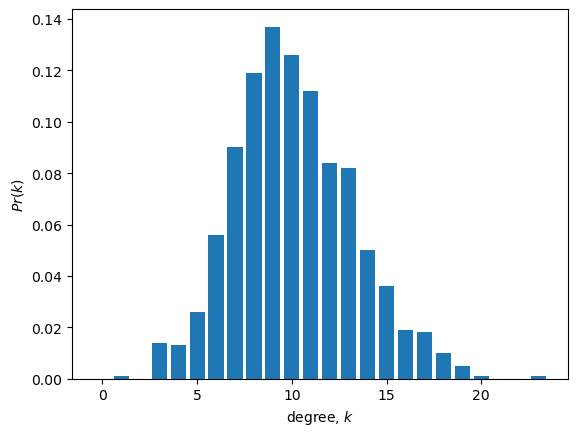

In [2]:
n = 1000   # number of nodes
p = 0.01   # connection probability

# generate graph object
g_er = nx.erdos_renyi_graph(n,p)

# calculate degree
hist = nx.degree_histogram(g_er)
bins = np.arange(0,len(hist),1)

# plot degree distribution
plt.bar(bins,hist/np.sum(hist))
plt.xlabel('degree, $k$');
plt.ylabel('$Pr(k)$');

<font color="red"> **Coding challenge.** Oftentimes we want to compare networks of equal density. However, the ER graph is stochastic and, although its mean density is fixed, individual instances of the graph will have different numbers of edges. Suppose you wanted to generate an ER graph with a fixed density (number of edges/number of possible edges). How might you go about doing this? Note that the networkx package does not include this functionality.</font>

### Watts-Strogatz model
At the end of the 20th century, advances in computation and the ability to share data through the World Wide Web made it possible for scientists to study the structure of real-world networks. It was clear that real-world networks look very little like the classical network models, e.g. ER networks or regular, lattice graphs. Duncan Watts and Steven Strogatz noted that, specifically, real-world networks seemed to balance properties of those two network models: their path length was comparable to that of the ER network while their clustering coefficient was comparable to that of a lattice graph. At the time, the field lacked a model to explain the co-appearance of these two features.

Watts \& Strogatz proposed, in a now canonical paper, a model that explains these features of real world networks. Specifically, they imagined a network that begins as a lattice but, through the addition of a small number of "shortcuts" (randomly deleting and adding edges), reduces its path length to levels comparable to ER networks while preserving its high levels of clustering.

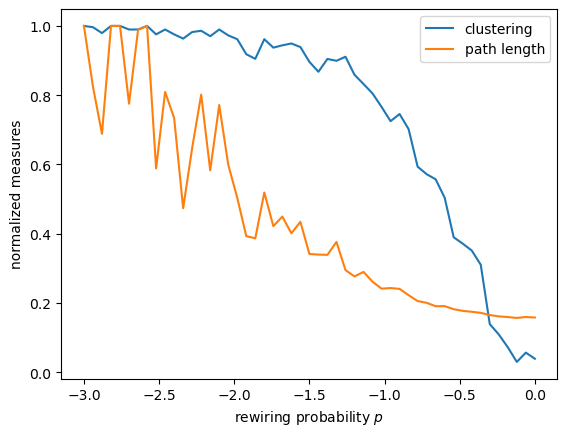

In [6]:
# set some parameters
n = 200       # number of nodes
k = 4         # degree of each node
nsamples = 51  # how finely to sample rewiring probabilities

# rewiring probabilites
plist = np.logspace(-3,0,nsamples)

# loop over all probabilities and calculate
# clustering and path length
c = np.zeros(nsamples)
l = np.zeros(nsamples)
for i,p in enumerate(plist):
    g_ws = nx.watts_strogatz_graph(n,k,p)
    c[i] = nx.average_clustering(g_ws)
    l[i] = nx.average_shortest_path_length(g_ws)

# plot curves
plt.plot(np.log10(plist),c/c[0],label='clustering')
plt.plot(np.log10(plist),l/l[0],label='path length')
plt.legend()
plt.xlabel('rewiring probability $p$');
plt.ylabel('normalized measures');

<font color="red"> **Coding challenge.** The WS model highlights a broad range of $p$ values as having ``small-worldness.'' An alternative strategy is to define a small-world index. The most popular version defines this measure as: $S = \frac{C}{C_r}/\frac{L}{L_r}$, where $C$ and $L$ are the global clustering and path length of a network and $C_r$ and $L_r$ are those measures for a density-matched random networks (all connections randomized). Small-world networks should have much greater clustering than a random network, so the ratio $\frac{C}{C_r} > 1$ while their path length should be comparable to that of a random network, so the ration $\frac{L}{L_r} \approx 1$. Thus, $S > 1$ for networks that have small-world features. Write a function for this index and use it to calculate the small-world index of WS networks as a function of $p$ in the above loop. Then plot the results.</font>

### Barabasi-Albert model
The WS model demonstrated that simple mechanisms -- in this case the addition of a little randomness -- can yield synthetic networks that stylistically capture features of real-world networks. However, the WS model misses other features of real-world networks, including heterogenous degree distributions and the presence of highly-connected hubs.

In 1999 Laszlo Barabasi and Reka Albert reported a model that could recapitulate these features. Theirs was a "growth model" in which nodes are added to a network iteratively. As each node is added, it connects to existing nodes, preferring those with higher degree.

/var/folders/6s/199b7xd94jndltdfy111gk4rv4555c/T/ipykernel_79722/1933908061.py:13: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(bins),np.log10(hist/np.sum(hist)))


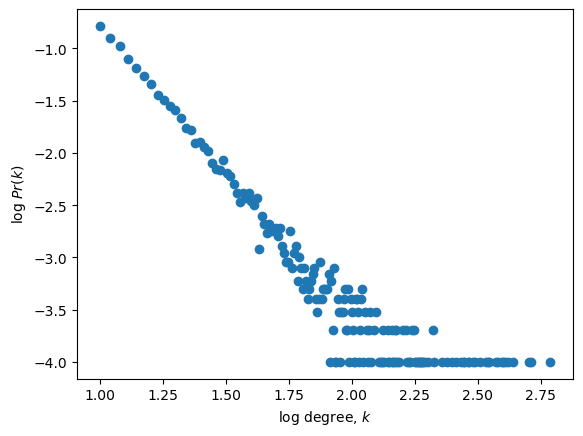

In [7]:
# set some parameters
n = 10000       # number of nodes
m = 10          # each node makes this many connections to existing nodes

# generate the network
g_ba = nx.barabasi_albert_graph(n,m)

# calculate degree
hist = nx.degree_histogram(g_ba)
bins = np.arange(0,len(hist),1)

# plot degree distribution
plt.scatter(np.log10(bins),np.log10(hist/np.sum(hist)))
plt.xlabel('log degree, $k$');
plt.ylabel('log $Pr(k)$');

<font color="red"> **Coding challenge.** Fit a linear model to the data in the above plot. What is the slope? How does the slope change as you vary $n$ and $m$?</font>

### Stochastic blockmodels
Still, other features were left unaccounted for, including "community structure", or the propensity for real-world networks to be divisible into meaningful sub-networks. The stochastic blockmodel addresses this gap. It imagines that each node, $i$, is assigned a cluster label, $c \in \{1 , \ldots, K \}$. The element $\omega_{rs}$ of the cluster interaction matrix, $\Omega \in \mathbb{R}^{K \times K}$, determines the probability that two nodes assigned to clusters $r$ and $s$ will be connected to one another.

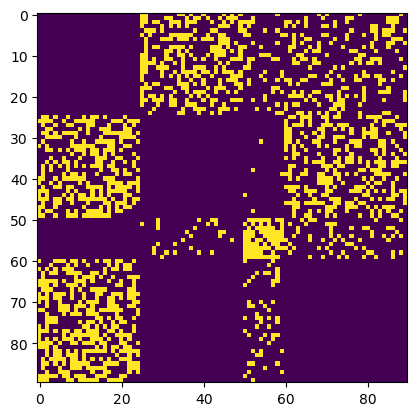

In [8]:
# set some parameters
sz = [25,25,10,30]                 # size of each community
prob = [                        # community-to-community connection probability
        [0.00,0.40,0.20,0.25],
        [0.50,0.00,0.01,0.40],
        [0.00,0.10,0.80,0.20],
        [0.50,0.00,0.20,0.00]
       ]

# generate the network 
g_sbm = nx.stochastic_block_model(sz, prob, directed=True)

# visualize connectivity matrix
a = nx.adjacency_matrix(g_sbm)
a = a.todense()
plt.imshow(a)

<font color="red"> **Coding challenge.** Although most applications imagine communities as being internally-dense and externally sparse--i.e. assortative--communities can interact through other motifs, including core-periphery and disassortatively. For instance, communities 3 and 4 in the above graph correspond to a core-periphery motif--community 3 is internally dense but weakly connects to community 4, whereas community 4 is internally sparse. Communities 1 and 2 form a disassortative motif, such that the between-community connection density is greater than either within-community density. More formally, if we have two communities--$r$ and $s$--we can classify their interactions using the following set of rules: assortative if $min(\omega_{rr},\omega_{ss}) > \omega_{rs}$; core-periphery if $\omega_{rr} > \omega_{rs} > \omega_{ss}$ or $\omega_{ss} > \omega_{rs} > \omega_{rr}$; disassortative if $\omega_{rs} > max(\omega_{rr},\omega_{ss})$. Write a function that considers all community pairs and classifies their interaction. How many interactions in the above network are assortative? Disassortative? Core-periphery?</font>

### Geometric random graphs
Other networks are spatially embedded so that link formation depends on the proximity of nodes to one another. Geometric random graphs model these dependencies. Here we illustrate this by positioning $n$ nodes within a unit circle and connect nodes separated by a radius of $r$.

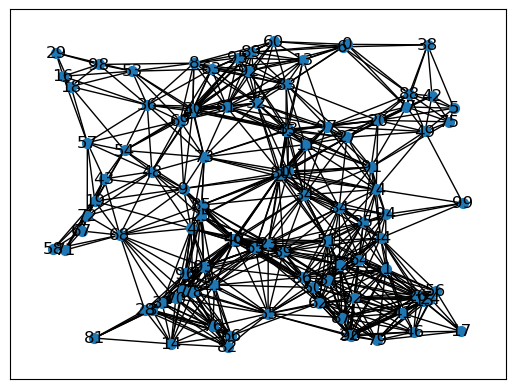

In [9]:
# set some parameters
n = 100                               # number of nodes
coor = np.random.uniform(-1,1,[n,2])  # coordinates
r = 0.5                               # radius for connecting nodes

# create list of nodes and positions
x = []
for i in range(n):
    y = [i,{"pos": (coor[i,0],coor[i,1])}]
    x.append(y)
    
# create graph and add nodes
G = nx.Graph()
G.add_nodes_from(x)

# create graph from nearest nodes
H = nx.from_edgelist(nx.geometric_edges(G, radius=r))

# plot network
nx.draw_networkx(H,pos=coor,node_size=50)

<font color="red"> **Coding challenge.** In the slides I note that there are alternative geometric models including one in which the probability of nodes $i$ and $j$ connecting to one another is proportional to $Pr(A_{ij} = 1) = \alpha e^{-\beta D_{ij}}$. Write code that implements this model. Perform a grid search over the parameters $\alpha$ and $\beta$ and measure some basic network properties, e.g. number of connections, modularity, clustering, etc. Plot their values as a heat map. How do these network measures depend on the parameter values?</font>

## Brain network models
### Quasi-dynamic model from Vertes et al 2012 and Betzel et al 2016
These papers proposed a two-term model of brain networks. The model is quasi-dynamic in that edges are added sequentially (over "time") though the time units are meaningless and the process is not intended to be a model of brain network growth, development, and evolution.

Briefly, the model takes the following form:

$$
\begin{equation}
Pr(A_{ij} = 1) \propto D_{ij}^{\eta} \times K_{ij}^{\gamma}
\end{equation}
$$

In this expression, $i$ and $j$ represent two nodes; $D_{ij}$ is the distance between their centroids; $K_{ij}$ is the topological term; $\eta$ and $\gamma$ are parameters that need to be fit to data.

The algorithm works as follows:
1. Initialize a (near-)empty adjacency matrix.
2. Calculate $Pr(A_{ij})$ for all pairs of nodes.
3. Probabilistically select one of those pairs and add it to the network.
4. Update the topological term.
5. Update $Pr(A_{ij})$.
6. Repeat steps 1-5 until $m$ edges have been added.

This procedure yields a synthetic network. We calculate for both the observed and synthetic network the following measure:
1. Node degree
2. Node clustering
3. Node betweenness centrality
4. Edge length (distance)

For each measure, we compare the observed and synthetic distribution using the Kolmogorov-Smirnov statistic. We define the energy of the synthetic network as:

$$
\begin{equation}
E = max(KS_k,KS_b,KS_c,KS_e)
\end{equation}
$$

Low values of $E$ correspond to better fits to the observed network.

#### Pure spatial model
The simplest version of this generative model is the purely spatial model, wherein $\gamma = 0$ and $K_{ij}^\gamma = 1$. The probability therefore resolves to $Pr(A_{ij} = 1) \propto D_{ij}^{\eta} \times 1$ and depends only on the separate between $i$ and $j$.

Here we illustrate how to implement this network and compare it against an empirical connectome.

/var/folders/6s/199b7xd94jndltdfy111gk4rv4555c/T/ipykernel_79722/2552234178.py:26: RuntimeWarning: divide by zero encountered in power
  e = np.power(d,eta)


Text(0, 0.5, 'nodes')

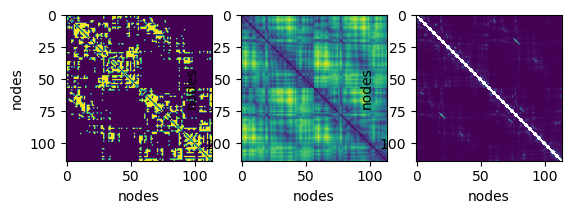

In [10]:
# load connectome
edgelist = np.loadtxt('data/edge_list.txt',delimiter=',')
nr,nc = np.shape(edgelist)

# load coordinates
coor = np.loadtxt('data/coor.txt',delimiter=',')
n,dummy = np.shape(coor)

# define matrix
a = np.zeros([n,n])
for e in edgelist:
    a[int(e[0] - 1),int(e[1] - 1)] = 1
    
# binary connectivity marix
a = np.triu(a,1) + np.transpose(np.triu(a,1))

# pairwise distance matrix
d = np.zeros([n,n])
for i in range(n):
    for j in range(n):
        d[i,j] = sum((coor[i] - coor[j])**2)**(0.5)
        
        
# calculate example probability matrix
eta = -2
e = np.power(d,eta)

# plot connectivity matrix
plt.subplot(1,3,1)
plt.imshow(a)
plt.xlabel('nodes')
plt.ylabel('nodes')

# plot distance matrix
plt.subplot(1,3,2)
plt.imshow(d)
plt.xlabel('nodes')
plt.ylabel('nodes')

# plot probability matrix
plt.subplot(1,3,3)
plt.imshow(e)
plt.xlabel('nodes')
plt.ylabel('nodes')

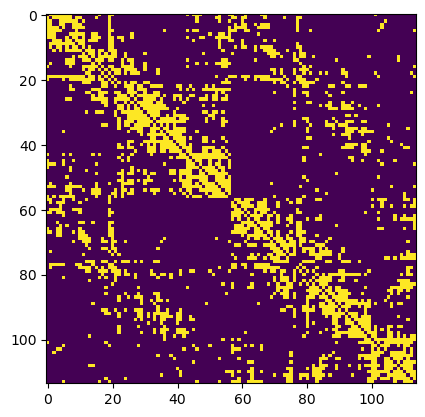

In [11]:
# set some parameters
eta = -5
mtgt = int(np.sum(a>0)/2)
amdl = np.zeros([n,n])
m = 0

# upper triangle indices
uv = np.triu_indices(n,k=1)

# get relative probability
p = np.power(d[uv],eta)

# normalize
p = p/sum(p)

# number of total possible edges
nedges = len(p)

# add edges
for m in range(mtgt):
    
    # choose an edge at random proportional to values in p;
    # then set that value to 0 so it doesn't get selected
    # again and then renormalize
    r = np.random.choice(nedges,1,p=p)
    p[r] = 0
    p = p/sum(p)
    
    # add the edge
    amdl[uv[0][r],uv[1][r]] = 1
    amdl[uv[1][r],uv[0][r]] = 1
    
plt.imshow(amdl)

In [12]:
# make graph objects for observed and model
g_observed = nx.Graph(a)
g_mdl = nx.Graph(amdl)

# calculate graph statistics
# degree
d_observed = nx.degree(g_observed)
d_mdl = nx.degree(g_mdl)

# clustering
c_observed = nx.clustering(g_observed)
c_mdl = nx.clustering(g_mdl)

# betweenness
b_observed = nx.betweenness_centrality(g_observed)
b_mdl = nx.betweenness_centrality(g_mdl)

# transform into lists from graph annotation objects
deg_observed = []
deg_mdl = []

clu_observed = []
clu_mdl = []

btw_observed = []
btw_mdl = []

for i in range(n):
    
    deg_observed.append(d_observed[i])
    deg_mdl.append(d_mdl[i])
    
    clu_observed.append(c_observed[i])
    clu_mdl.append(c_mdl[i])
    
    btw_observed.append(b_observed[i])
    btw_mdl.append(b_mdl[i])
    
# calculate ks statistics
ksk,dummy = stats.ks_2samp(deg_observed,deg_mdl)
ksc,dummy = stats.ks_2samp(clu_observed,clu_mdl)
ksb,dummy = stats.ks_2samp(btw_observed,btw_mdl)

# calcualte edge length distributions
e_observed = d[a > 0]
e_mdl = d[amdl > 0]
kse,dummy = stats.ks_2samp(e_observed,e_mdl)

# make a list of all ks stats
ks_all = [ksk,ksc,ksb,kse]

# combine into an energy
energy = max(ks_all)
print(energy)

0.41228070175438597


<font color="red"> **Coding challenge.** Keep $\eta$ fixed at one value, but write a loop that generates many synthetic networks and evaluates each of their energies. Plot the mean and standard deviation of energy as a function of the number of samples. How many samples do you need before the variance becomes small (you get to decide what it means to be small).</font>

<font color="red">Write two functions from the above code. The first should be called <code>genmod_sptl</code> and takes as input the parameters <code>eta</code>, <code>d</code>, and <code>mtgt</code>. It should return the adjacency matrix for the synthetic network. The second function should be called <code>calculate_energy</code> and should take as input the adjacency matrices for the empirical and synthetic networks, returning the four KS statistics and the energy of the synthetic network.</font>

<font color="red">Now, systematically vary the value of $\eta$ from -4 to 0. How does energy change as you vary $\eta$? Can you identify the ``sweet spot'' where $E$ appears close to a local minimum?</font>

#### Nearest-neighbor + spatial model
We can make this generative model more complicated by setting $\gamma \ne 0$. Here, we will set $K_{ij} = \sum_l A_{il} A_{lj}$, which is equal to the number of neighbors shared by nodes $i$ and $j$. The probability therefore resolves to $Pr(A_{ij} = 1) \propto D_{ij}^{\eta} \times K_{ij}^\gamma$ and depends not nly on the separate between $i$ and $j$, but the extent to which their neighborhoods overlap.

Here we illustrate how to implement this network and compare it against an empirical connectome.

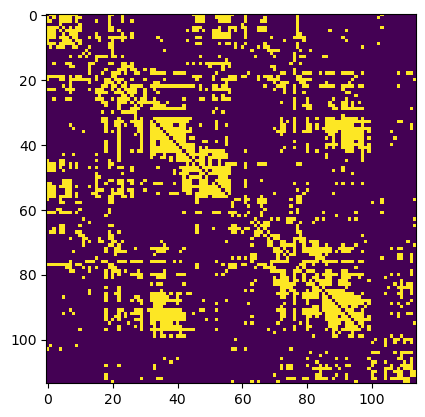

In [13]:
# set some parameters
eta = -2.5
gam = 2
mtgt = int(np.sum(a>0)/2)
amdl = np.zeros([n,n])
m = 0

# upper triangle indices
uv = np.triu_indices(n,k=1)

# common neighbors
b = np.ones([n,n])

# get relative probability
p = np.power(d[uv],eta)*np.power(b[uv],gam)

# normalize
p = p/sum(p)

# number of total possible edges
nedges = len(p)

# add edges
indx = []
for m in range(mtgt):
    
    # choose an edge at random proportional to values in p;
    # then set that value to 0 so it doesn't get selected
    # again and then renormalize
    r = np.random.choice(nedges,1,p=p)
    
    # add the edge
    amdl[uv[0][r],uv[1][r]] = 1
    amdl[uv[1][r],uv[0][r]] = 1
    
    # update the number of shared neighbors (and add 1 to avoid 0's)
    b = np.matmul(amdl,amdl) + 1
    
    # update list of existing edges by index
    indx.append(r)
    
    # calculate relative probability
    p = np.power(d[uv],eta)*np.power(b[uv],gam)
    
    # set equal to zero existing edges and normalize
    p[indx] = 0
    p = p/sum(p)
    
    
plt.imshow(amdl)

In [14]:
# make graph objects for observed and model
g_observed = nx.Graph(a)
g_mdl = nx.Graph(amdl)

# calculate graph statistics
# degree
d_observed = nx.degree(g_observed)
d_mdl = nx.degree(g_mdl)

# clustering
c_observed = nx.clustering(g_observed)
c_mdl = nx.clustering(g_mdl)

# betweenness
b_observed = nx.betweenness_centrality(g_observed)
b_mdl = nx.betweenness_centrality(g_mdl)

# transform into lists from graph annotation objects
deg_observed = []
deg_mdl = []

clu_observed = []
clu_mdl = []

btw_observed = []
btw_mdl = []

for i in range(n):
    
    deg_observed.append(d_observed[i])
    deg_mdl.append(d_mdl[i])
    
    clu_observed.append(c_observed[i])
    clu_mdl.append(c_mdl[i])
    
    btw_observed.append(b_observed[i])
    btw_mdl.append(b_mdl[i])
    
# calculate ks statistics
ksk,dummy = stats.ks_2samp(deg_observed,deg_mdl)
ksc,dummy = stats.ks_2samp(clu_observed,clu_mdl)
ksb,dummy = stats.ks_2samp(btw_observed,btw_mdl)

# calcualte edge length distributions
e_observed = d[a > 0]
e_mdl = d[amdl > 0]
kse,dummy = stats.ks_2samp(e_observed,e_mdl)

# make a list of all ks stats
ks_all = [ksk,ksc,ksb,kse]

# combine into an energy
energy = max(ks_all)
print(energy)

0.132952691680261


<font color="red"> **Coding challenge.** Systematically vary both $\eta$ and $\gamma$; this exploration will trace out a 2D parameter space with energy defined at each point. Can you identify the ``sweet spot'' where $E$ appears close to a local minimum? Is the best 2-parameter model better than the 1-parameter spatial model? By how much?</font>